# TP 05 : Régularisation et sélection d'attributs

Binômes :
- Binôme 1
- Binôme 2

## I. Implémentation

Dans cette partie, on va implémenter deux fonctions de régularisation et deux fonctions de filtrage. 
La régularisation sera appliquée sur la régression logistique binaire dont le code est fourni ici.


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline


# Le code de la réression logistique 

# Somme pondérée des caractéristiques
def zf(X, theta):
    return np.dot(X, theta)

# Transformation d'une valeur à une probabilité
def sg(Z):
    return  1 / (1 + np.exp(-Z))

def hf(X, theta):
    return sg(zf(X, theta))

# Fonction objective
# utilisation d'un petit nombre pour éviter log(0)
def BCE(Y, H, e=1e-8): 
    return - np.mean(Y * np.log(H) + (1-Y) * np.log(1-H))  

# Fonction des gradients
def dBCE(X, Y, H):
    return  np.dot(X.T, H-Y)/X.shape[0]

# Fonction de mise à jour des paramètres
def majTheta(Theta, Gradient, alpha): 
    return Theta - alpha * Gradient


### I.1.  Régularisation (Ridge)


#### I.2.1. Fonction du coût de la régularisation L2

La fonction du coût utilisée de la régularisation **L2** est donnée somme : 

$$J_{L2}(\theta) = \frac{\lambda }{2M} \sum\limits_{j=1}^{N} \theta_j^2$$

- **M** : nombre des échantiollons (observations)
- **N** : nombre des caractéristiques


**Remarque** Dans les énoncés, la régularisation n'est pas divisée par le nombre des échantillons $M$. Mais, en pratique, on la divise. [Voici des réponses sur stackexchange](https://stats.stackexchange.com/questions/287920/regularisation-why-multiply-by-1-2m) expliquant pourquoi.

In [2]:
# TODO Réaliser la fonction du coût de la régularisation L2
def J_L2(Theta, M, Lambda=0.):
    return None

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : (0.0, 0.0005050000000000001)
#---------------------------------------------------------------------

Theta_t = np.array([1, 0.01, 0.1]) # Theta avec le premier élément pour le biais


J_L2(Theta_t, 4), J_L2(Theta_t, 4, Lambda=.4)

(0.0, 0.0005050000000000001)

#### 1.2.2. Gradients de la régularisation L2

La fonction des gradients de la régularisation **L2** est définie comme suit :
 
$$\frac{\partial J_{L2}(\theta)}{\partial \theta_j} = \frac{\lambda }{M} \theta_j \text{ si } j > 0$$

$$\frac{\partial J_{L2}(\theta)}{\partial \theta_0} = 0$$

- **X** : matrice (échantillons X caractéristiques)
- **Y** : vecteur des sorties réelles (échantillons)
- **H** : vecteur des estimations (échantillons)
- **M** : nombre des échantillons


In [3]:
# TODO Réaliser la fonction du gradient de la régularisation L2
def dJ_L2(Theta, M, Lambda=0.):
    return None


#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : (array([0., 0., 0.]), array([0.   , 0.001, 0.01 ]))
#---------------------------------------------------------------------

Theta_t = np.array([1, 0.01, 0.1]) # Theta avec le premier élément pour le biais

dJ_L2(Theta_t, 4), dJ_L2(Theta_t, 4, Lambda=0.4)

(array([0., 0., 0.]), array([0.   , 0.001, 0.01 ]))

### I.2.  Régularisation (Lasso)

#### I.2.1. Fonction du coût de la régularisation L1

La fonction du coût de la régularisation **L1** sur cette fonction, on aura : 

$$J_{L1}(\theta) = \frac{\lambda}{M} \sum\limits_{j=1}^{N} |\theta_j|$$

- **M** : nombre des échantiollons (observations)
- **N** : nombre des caractéristiques

In [4]:
# TODO Réaliser la fonction du coût de la régularisation L1
def J_L1(Theta, M, Lambda=0.):
    return None

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : (0.0, 0.011000000000000001)
#---------------------------------------------------------------------

Theta_t = np.array([1, 0.01, 0.1]) # Theta avec le premier élément pour le biais

J_L1(Theta_t, 4), J_L1(Theta_t, 4, Lambda=.4)

(0.0, 0.011000000000000001)

#### I.2.2. Mise à jour des paramètres 

Le dérivé de $L1$ est :
$$\frac{\partial L1}{\partial \theta_j} = \frac{\partial \frac{\lambda }{M} \sum\limits_{j=1}^{N} |\theta_j|}{\partial \theta_j} = \frac{\lambda }{M} \frac{\theta_j}{|\theta_j|}$$

Il est clair que le gradient n'est pas défini dans le cas $\theta_j = 0$. 
En appliquant [le sous-différentiel](https://fr.wikipedia.org/wiki/Sous-diff%C3%A9rentiel), on aura : 
$$
\frac{\partial L1}{\partial \theta_j} = 
\begin{cases}
-\frac{\lambda}{M} & \text{si } \theta_j < 0 \\
0 & \text{si } \theta_j = 0 \\
\frac{\lambda}{M} & \text{si } \theta_j > 0 \\
\end{cases}
$$

On ne peut pas utiliser la descente du gradient pour résoudre ça. 
On va utiliser un alorithme de descente du gradient approximative, qui s'appelle **Iterative soft-thresholding algorithm (ISTA)**. 
$$prox(\theta) = S_{\lambda}(\theta) = 
\begin{cases}
\theta_j + \lambda & \text{si } \theta_j < - \lambda \\
0 & \text{si } -\lambda \le \theta_j \le \lambda \\
\theta_j - \lambda & \text{si } \theta_j > \lambda \\
\end{cases}
$$

**Vous devez implémenter cette fonction**

Les thétas sont mises à jour comme suite : 
$$ \theta = S_{\lambda}(\theta - \frac{\partial J_0}{\partial \theta})$$
Où, $J_0$ est la fonction du coût sans régularisation

Source : [Ryan Tibshirani (2015), Lecture 08: Proximal Gradient Descent](https://www.stat.cmu.edu/~ryantibs/convexopt-S15/scribes/08-prox-grad-scribed.pdf)

In [5]:
# TODO Réaliser la fonction soft-thresholding : prox(theta)
def S(Theta, Lambda): 
    return None

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : array([ 0.5 , -0.15,  0.  ])
#---------------------------------------------------------------------

                     
Theta_t = np.array([0.5, -0.25, 0.05])

S(Theta_t, 0.1)

array([ 0.5 , -0.15,  0.  ])

### I.3. Régression avec réglularisation

**Rien à programmer ici**


In [6]:
def descente(X, Y, Theta, approx=False, it_max=100, alpha=0.1, Lambda=0.): 

    M = len(Y)
    
    if approx :
        def maj(Theta, J, dJ):
            J += J_L1(Theta, M, Lambda=Lambda)
            Theta = majTheta(Theta, dJ, alpha)
            Theta = S(Theta, Lambda/M) # Lamdba doit être divisé sur le nombre des échantillons
            return J, Theta
    else:
        def maj(Theta, J, dJ):
            J += J_L2(Theta, M, Lambda=Lambda)
            dJ += dJ_L2(Theta, M, Lambda=Lambda)
            Theta = majTheta(Theta, dJ, alpha)
            return J, Theta
            
    couts = []
    Thetas = []
    
    #pour ne pas modifier le contenu de Theta en entrée
    Theta = Theta.copy()
    
    # ici, on boucle jusqu'à arriver aux maximum des itérations
    for it in range(it_max):
        H = hf(X, Theta)
        J = BCE(Y, H)
        dJ = dBCE(X, Y, H)
        J, Theta = maj(Theta, J, dJ)
        couts.append(J)
        Thetas.append(Theta.copy())
    
    return Thetas, couts

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# (array([ 0.94839532, -0.56840255,  1.2813832 ]),
#  array([0.07440919, 0.        , 0.        ]),
#  array([ 0.93431089, -0.53451115,  1.03711393]))
#
#---------------------------------------------------------------------

X_t = np.array([
    [1, 1, 0.2],
    [1, 2, 0.1],
    [1, 3, 0.4],
    [1, 4, 0.3]
])

Theta_t = np.array([1., 1., 1.])

Y_t = np.array([1, 0, 1, 0])

# pas de régularisation : Lambda = 0
Theta_P, J_P = descente(X_t, Y_t, Theta_t)
# régularisation L1 : approximation avec lambda
Theta_1, J_1 = descente(X_t, Y_t, Theta_t, approx=S, Lambda=0.1)
# régularisation L2 : lambda sans approximation
Theta_2, J_2 = descente(X_t, Y_t, Theta_t, Lambda=0.1)

Theta_P[-1], Theta_1[-1], Theta_2[-1]


(array([ 0.94839532, -0.56840255,  1.2813832 ]),
 array([ 0.46328109, -0.15750488,  0.        ]),
 array([ 0.93431089, -0.53451115,  1.03711393]))

In [7]:
import outils

class RegLogReg(object): # Régression logistique régularisée
    
    # par défaut : pas de régularisation
    def __init__(self, nbr_iter=100, alpha=.01, Lambda=1.0, norm=True, const=True, reg=None): 
        self.nbr_iter = nbr_iter
        self.alpha = alpha
        self.norm = norm
        self.const = const
        self.approx = None
        self.Lambda = Lambda
        if reg == "l1":
            self.approx = S
        elif reg != "l2":
            self.Lambda = 0.
    
    def entrainer(self, X, Y): 
        X_pre, self.mean, self.std = outils.preparer(X, norm=self.norm, const=self.const)
        Theta = outils.generer_uns_1(X_pre.shape[1])#
        self.Thetas, self.couts = descente(X_pre, Y, Theta, 
                                          approx=self.approx, 
                                          it_max=self.nbr_iter, 
                                          alpha=self.alpha, 
                                          Lambda=self.Lambda)
        
    # La prédiction
    # si classes=True elle rend une vecteur de 1 et 0
    # sinon elle rend un vecteur de probabilités
    def predire(self, X, classes=True, seuil=0.5, it=-1):
        X_pre, self.mean, self.std = outils.preparer(X, norm=self.norm, const=self.const, mean=self.mean, std=self.std)
        H = hf(X_pre, self.Thetas[it])
        if classes:
            return (H >= seuil).astype(int)
        return H

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# (array([0.86383643, 0.5273866 , 0.96123235]),
#  array([0.79153709, 0.        , 0.        ]),
#  array([0.8515839 , 0.38351525, 0.7672672 ]),
#  array([0, 0, 1, 1]))
#---------------------------------------------------------------------

X_t = np.array([
    [100, 20],
    [200, 10],
    [300, 40],
    [400, 30]
])

Y_t = np.array([1, 0, 1, 0])

# pas de régularisation
reglog = RegLogReg()
reglog.entrainer(X_t, Y_t)
# régularisation L1
reglog1 = RegLogReg(reg="l1")
reglog1.entrainer(X_t, Y_t)
# régularisation L2
reglog2 = RegLogReg(reg="l2")
reglog2.entrainer(X_t, Y_t)

reglog.Thetas[-1], reglog1.Thetas[-1], reglog2.Thetas[-1], reglog.predire(X_t)

(array([0.86383643, 0.5273866 , 0.96123235]),
 array([0.79241836, 0.        , 0.        ]),
 array([0.8515839 , 0.38351525, 0.7672672 ]),
 array([0, 0, 1, 1]))

### I.4. Filtrage des attributs (ANOVA : Analysis of Variance)

Le nombre des échantillons pour chaque classe est différent. 
Pour cette raison, on va implémenter ANOVA for a CRD (COMPLETELY RANDOM DESIGN). 
On va implémenter l'algorithme expliqué dans [Richard Horsly (2012) COMPLETELY RANDOM DESIGN (CRD)](https://www.ndsu.edu/faculty/horsley/CRD.pdf). 
Pour valider l'implémentation, on va utiliser les mêmes données de la page 10.

#### I.4.1. One way F value pour un seul attribue

pour un attribut donné ($A$), on divise l'ensemble de ses échantillons sur $N$ ensembles, où $N$ est le nombre des classes. 

$$CF = \frac{(\sum_{ij} A_{ij})^2}{\sum_j |A_j|} $$
Où $\sum_{ij} A_{ij}$ est la somme de toutes les valeurs de toutes les classes, 
$\sum_j |A_j|$ est le nombre total des échantillons (de toutes les classes)

$$ TotalSS = \sum_{ij} A_{ij}^2 - CF$$
Où $\sum_{ij} A_{ij}^2$ est les somme des carrées de toutes les valeurs

$$ TreatmentSS = \sum_j \frac{(\sum_{i} A_{ij})^2}{|A_j|} - CF$$
Où $\sum_{i} A_{ij}$ est la somme des valeurs de la classe $j$ et $|A_j|$ est le nombre des éléments dans la classe $j$

$$ ErrorSS = TotalSS - TreatmentSS $$


In [8]:
# TODO Compléter la fonction one-way ANOVA pour un attribut
def f_oneway(A): 
    # A est une liste de N listes où N est le nombre des classes
    # Ces listes n'ont pas la même taille
    nbrs = np.array([len(a) for a in A]) # nombre des échantillons de chaque classe
    sommes = np.array([np.sum(a) for a in A]) # somme des valeurs de chaque classe
    sommes_caree = np.sum([np.sum(np.array(a)**2) for a in A]) # somme des valeurs carrées de toutes les valeurs
    
    # Compléter ici
    #====================================
    CF = None
    TotalSS = None
    TreatmentSS = None
    ErrorSS = None
    #====================================
    
    MSB = TreatmentSS / (len(A) - 1) 
    MSW =  ErrorSS/(nbrs.sum() - len(A))
    return MSB/MSW


#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 6.418894830659841
#---------------------------------------------------------------------

AA = [[2., 2.2, 1.8, 2.3, 1.7], [1.7, 1.9, 1.5], [2., 2.4, 2.7, 2.5, 2.4], [2.1, 2.2, 2.2, 1.9]]
# Résultat : 6.418894830659841 (voir page 11 step 6)
f_oneway(AA)

6.418894830659841

#### I.4.2. One way F value pour tous les attribues

**Rien à programmer ou analyser ici**

Ici, on va calculer ANOVA pour chaque attribut. 
Les attributs avec des grandes valeurs ANOVA sont meilleurs. 



In [19]:
def anova_f(X, Y): 
    
    C = np.unique(Y)
    F = []
    for j in range(X.shape[1]): 
        A = X[:, j]
        F.append(f_oneway([A[Y==c] for c in np.unique(Y)]))
    return np.array(F)


#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# (array([  6.41889483,   0.40595497, 105.2745098 ]),
#  array([  6.41889483,   0.40595497, 105.2745098 ]))
#---------------------------------------------------------------------

X_t = np.array(
    [[2. , 1. , 1. ],
     [2.2, 2. , 1. ],
     [1.8, 3. , 1. ],
     [2.3, 4. , 1. ],
     [1.7, 5. , 2. ],
     [1.7, 1. , 2. ],
     [1.9, 2. , 2. ],
     [1.5, 3. , 2. ],
     [2. , 1. , 3. ],
     [2.4, 2. , 3. ],
     [2.7, 3. , 3. ],
     [2.5, 4. , 3. ],
     [2.4, 5. , 3. ],
     [2.1, 1. , 4. ],
     [2.2, 2. , 4. ],
     [2.2, 3. , 4. ],
     [1.9, 4. , 4. ]])

Y_t = np.array(["A", "A", "A", "A", "A", "B", "B", "B", "C", "C", "C", "C", "C", "D", "D", "D", "D"])

# pour valider, on va utiliser f_classif de scikit-learn 
# https://github.com/scikit-learn/scikit-learn/blob/95d4f0841d57e8b5f6b2a570312e9d832e69debc/sklearn/feature_selection/_univariate_selection.py#L42
from sklearn.feature_selection import f_classif
f_sklearn, a = f_classif(X_t, Y_t)
# la première liste est celle de scikit-learn et la deuxième est la notre
f_notre = anova_f(X_t, Y_t)

f_sklearn, f_notre

(array([  6.41889483,   0.40595497, 105.2745098 ]),
 array([  6.41889483,   0.40595497, 105.2745098 ]))

## II. Application et analyse

On va utiliser le dataset [Diabetics prediction using logistic regression](https://www.kaggle.com/kandij/diabetes-dataset). 

In [10]:
diabetes = pd.read_csv("datasets/diabetes2.csv") 
X_diabetes = diabetes.iloc[:, :-1].values  
Y_diabetes = diabetes.iloc[:, -1].values

# Cette configuration est mise en place comme ceci exprès
# C'est pour tester le cas où la régression est difavorisée
NBR_TEST = 240
# Supposant que les 30% premières lignes sont pour le test et le reste pour l'entraînement
X_test = X_diabetes[-NBR_TEST:, :] # 30% ou plus
Y_test = Y_diabetes[-NBR_TEST:]

X_train = X_diabetes[:-NBR_TEST, :] 
Y_train = Y_diabetes[:-NBR_TEST]

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### II.1. Régularisation

Nous avons entrainé 3 modèles :
- **reglog** : régression logistique sans régularisation
- **reglog_l1** : régression logistique avec régularisation L1
- **reglog_l2** : régression logistique avec régularisation L2

Nous avons testé ces modèles en utilisant deux datasets (avec la métrique F1 dans chaque itération) :
- **entrainement** : pour tester la convergence (fitting)
- **test** : pour tester la généralisation

Afin de capturer les F1 scores et les paramètres, nous avons entrainé chaque modèle avec une seule itération et utiliser une boucle globale pour contrôler les traitements de chaque itération. Pour continuer l'entrainement à partir des thétas précédents, nous avons activé l'option **warm_start**. Ceci va générer des graphiques non lisses (puisqu'on lance l'algorithme d'optimisation à chaque itération).

#### II.1.1.  Convergence et généralisation sans et avec régularisation par itérations

Ici, on suppose que l'algorithme a convergé lorsqu'il atteint le maximum de F1 score dans l'antrainement (normalement, il doit sortir s'il y a une chutte de F1 score et retourne les thétats les plus optimaux). Donc, au delà du point de la convergence, nous avons continuer l'itération pour voir ce qui va se passer. 


**Analyser les résultats**

- Que remarquez-vous ?
- Analyser les cas de convergence (qui converge plus rappidement, avec quel prix (quel est le gain ou la perte)) en précisant dans ce cas l'intérêt de la régularisation. 
- Pourquoi les modèles avec régularisation perdent-ils de performance en avançant le nombre des itérations ?

**Réponse**

- ...
- ...
- ...

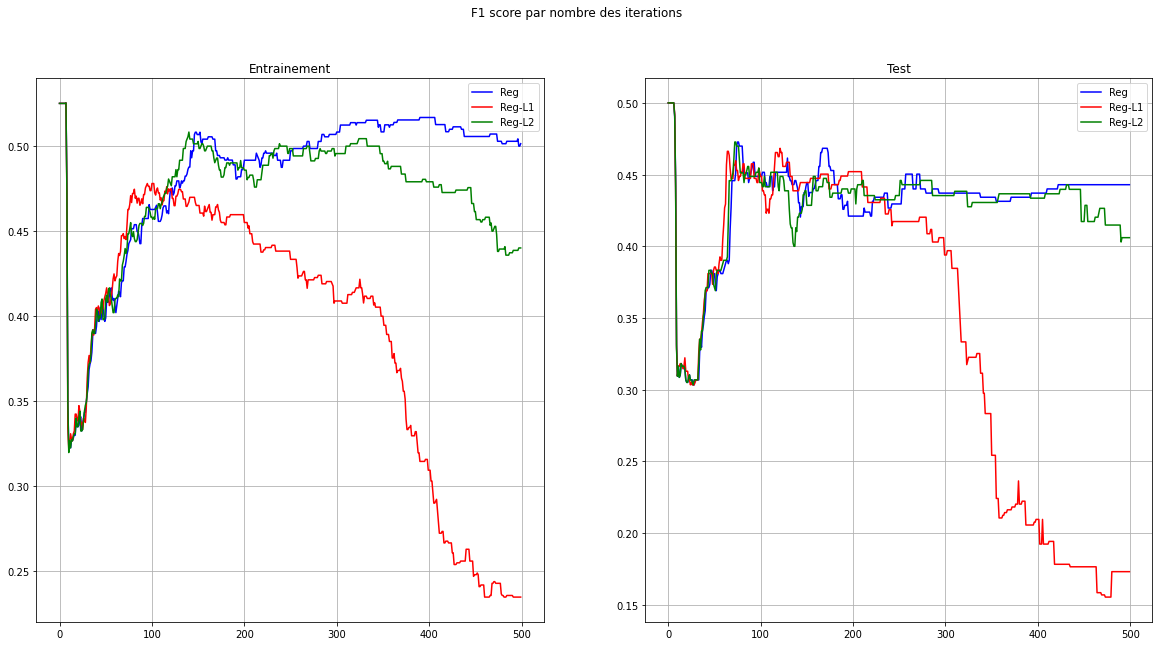

In [23]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
warnings.filterwarnings("ignore", category=ConvergenceWarning)

MAX_IT = 500
CC = 0.002
COEF_ = np.array([[1.] * X_train.shape[1]])
INTERCEPT_ = np.array([1.])

reglog = LogisticRegression(penalty='none', solver="saga", max_iter=1, warm_start=True, random_state=0)
reglog.coef_ = COEF_
reglog.intercept_ = INTERCEPT_
reglog_l1 = LogisticRegression(penalty='l1', solver="saga", max_iter=1, warm_start=True, random_state=0, C=CC)
reglog_l1.coef_ = COEF_
reglog_l1.intercept_ = INTERCEPT_
reglog_l2 = LogisticRegression(penalty='l2', solver="saga", max_iter=1, warm_start=True, random_state=0, C=CC)
reglog_l2.coef_ = COEF_
reglog_l2.intercept_ = INTERCEPT_

coefs = []
coefs0 =[]
f1train = []
f1test = []

coefs_ridge = []
coefs0_ridge = []
f1train_ridge = []
f1test_ridge = []

coefs_lasso = []
coefs0_lasso = []
f1train_lasso = []
f1test_lasso = []

for it in range(MAX_IT):
    reglog.fit(X_train, Y_train)
    coefs.append(reglog.coef_.flatten().tolist())
    coefs0.append(reglog.intercept_[0])
    f1train.append(f1_score(Y_train, reglog.predict(X_train)))
    f1test.append(f1_score(Y_test, reglog.predict(X_test)))
    
    reglog_l1.fit(X_train, Y_train)
    coefs_lasso.append(reglog_l1.coef_.flatten().tolist())
    coefs0_lasso.append(reglog_l1.intercept_[0])
    f1train_lasso.append(f1_score(Y_train, reglog_l1.predict(X_train)))
    f1test_lasso.append(f1_score(Y_test, reglog_l1.predict(X_test)))
    
    reglog_l2.fit(X_train, Y_train)
    coefs_ridge.append(reglog_l2.coef_.flatten().tolist())
    coefs0_ridge.append(reglog_l2.intercept_[0])
    f1train_ridge.append(f1_score(Y_train, reglog_l2.predict(X_train)))
    f1test_ridge.append(f1_score(Y_test, reglog_l2.predict(X_test)))


coefs = np.array(coefs)
coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle("F1 score par nombre des iterations")
fig.set_figwidth(20)
fig.set_figheight(10)

ax1.plot(range(MAX_IT), f1train, color="blue", label="Reg")
ax1.plot(range(MAX_IT), f1train_lasso, color="red", label="Reg-L1")
ax1.plot(range(MAX_IT), f1train_ridge, color="green", label="Reg-L2")
ax1.legend()
ax1.set_title("Entrainement")
ax1.grid()

ax2.plot(range(MAX_IT), f1test, color="blue", label="Reg")
ax2.plot(range(MAX_IT), f1test_lasso, color="red", label="Reg-L1")
ax2.plot(range(MAX_IT), f1test_ridge, color="green", label="Reg-L2")
ax2.legend()
ax2.set_title("Test")
ax2.grid()

plt.show()

#### II.1.2. Convergence des paramètres par itérations

Ici, nous avons afficher les valeurs des paramètres thétas pour chaque itération. 

**Analyser les résultats**

- Que remarquez-vous ?
- Analyser la convergence des valeurs des paramètres entre les trois modèles (pourquoi dans les deux modèles avec régularisation, les valeurs se rapprochent plus de 0, pourquoi il y a des paramètres qui convergent plus rappidement que d'autres)
- Est-ce qu'on peut retirer quelques attributs jugés importants par le modèle ? Si oui, lequels ici ? Si non, pourquoi ?
- Est-ce qu'on peut utiliser la régularisation comme sélection d'attribut ? Préciser (avec argumentation)

**Réponse**

- ...
- ...
- ...
- ...

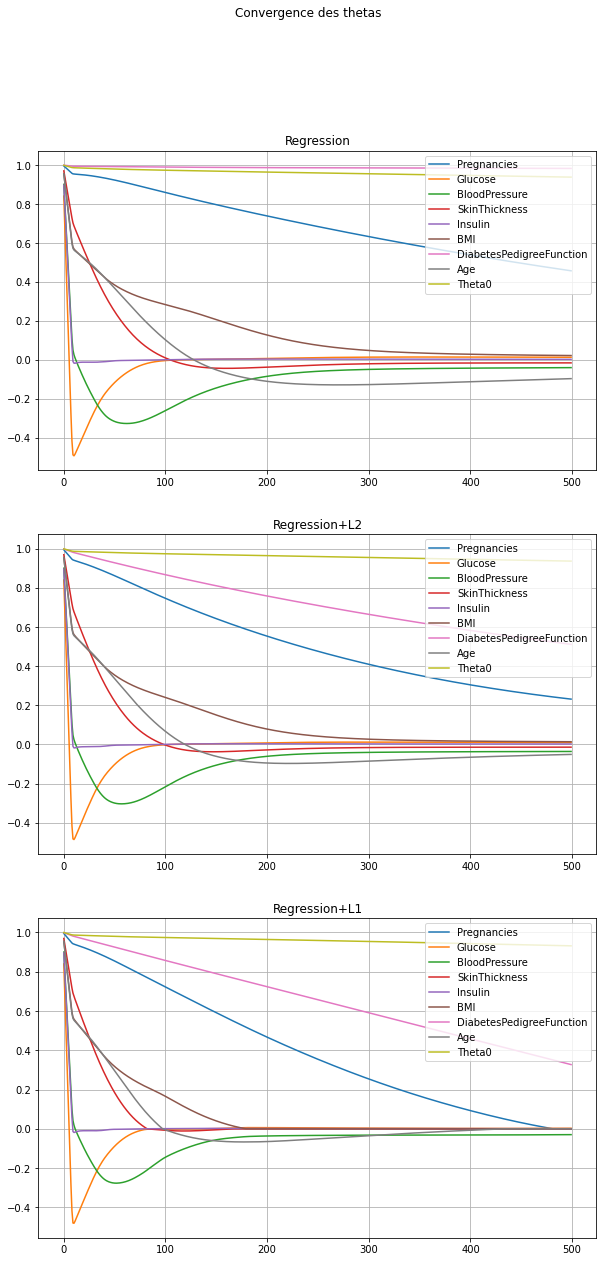

In [24]:
labels = list(diabetes.columns)
labels.pop()
#labels = ["Theta0"] + labels
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.suptitle("Convergence des thetas")
fig.set_figwidth(10)
fig.set_figheight(20)
for i in range(len(labels)): 
    ax1.plot(range(MAX_IT), coefs[:, i], label=labels[i])
    ax3.plot(range(MAX_IT), coefs_lasso[:, i], label=labels[i])
    ax2.plot(range(MAX_IT), coefs_ridge[:, i], label=labels[i])
ax1.plot(range(MAX_IT), coefs0, label="Theta0")
ax2.plot(range(MAX_IT), coefs0_ridge, label="Theta0")
ax3.plot(range(MAX_IT), coefs0_lasso, label="Theta0")
ax1.legend()
ax1.set_title("Regression")
ax1.grid()
ax3.legend()
ax3.set_title("Regression+L1")
ax3.grid()
ax2.legend()
ax2.set_title("Regression+L2")
ax2.grid()

plt.show()

### II.2. Sélection d'attributs

Ici, on va utiliser le même dataset précédent sur plusieurs types de sélection d'attributs.

#### II.2.1. Sélection d'attributs par filtrage (Choix ANOVA)

Nous avons extrait les F values ANOVA pour les différents attributs. 

**Analyser les résultats** 

- Quels sont les attributs les plus importants d'après F values ?
- Pourquoi un attribut est considéré comme important dans ANOVA (aspect mathématique et logique : les valeurs de la'ttribut et de la prédiction Y) ?

**Réponse**

- ...
- ...

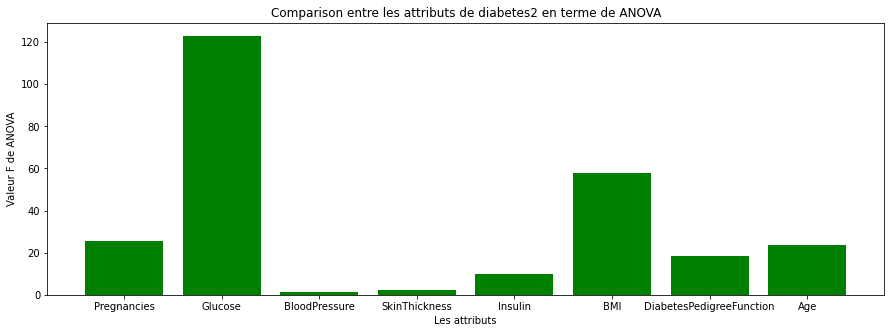

In [25]:
from sklearn.feature_selection import f_classif
f, a = f_classif(X_train, Y_train)

labels_diabetes = list(diabetes.columns[:-1])
x_pos = range(len(f))
plt.figure(figsize=(15,5))
plt.bar(labels_diabetes, f, color="green")
plt.xlabel("Les attributs")
plt.ylabel("Valeur F de ANOVA")
plt.title("Comparison entre les attributs de diabetes2 en terme de ANOVA")

plt.xticks(x_pos, labels_diabetes)

plt.show()


#### II.2.2. Sélection d'attributs par filtrage (Convergence et performance)

Ici, on va utiliser ANOVA pour pré-sélectionner les caractéristiques qui donnent 50% de variance. On veut comparer la convergence du modèle normal contre celui avec pré-sélection ANOVA.

**Analyser les résultats** 

- Pourquoi la performance de la régression sans filtrage est meilleure dans l'entrainement et pas dans et test; et l'inverse pour la régression avec filtrage ? (P.S. on ne parle pas ici du sur-apprentissage; mais des attributs : nombre et qualité)
- Est-ce que le filtrage PEUT prévenir le sur-apprentissage ? Si oui, comment ? Si non, pourquoi ?

**Réponse**

- ...
- ...


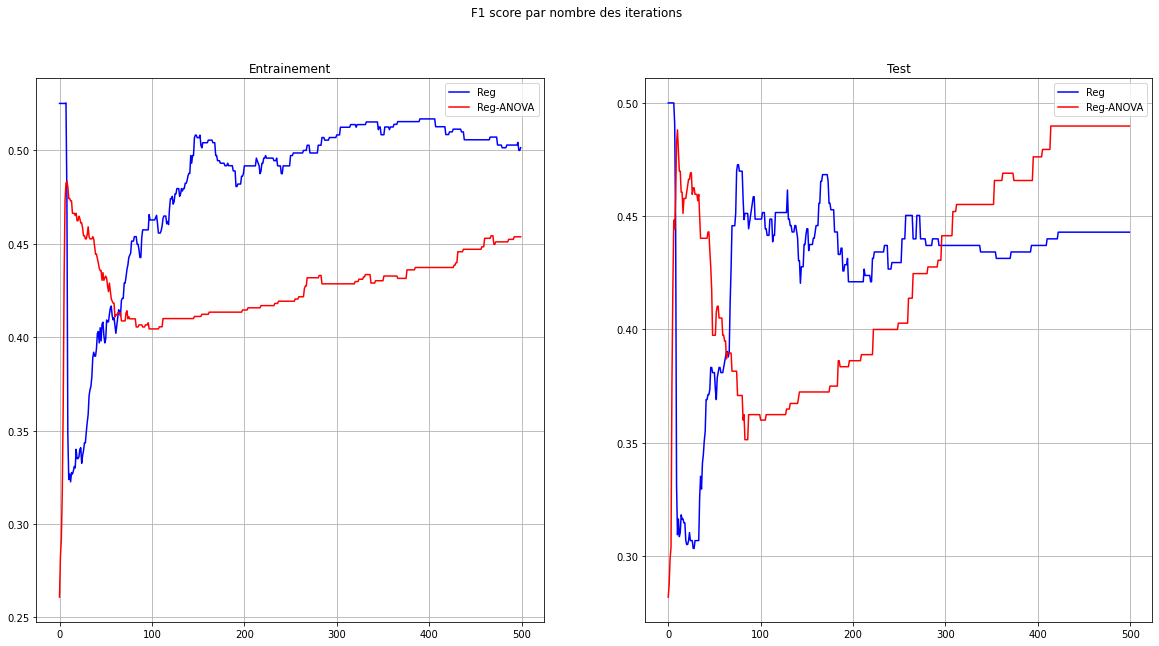

In [26]:
from sklearn.feature_selection import SelectPercentile

selecteur = SelectPercentile(score_func=f_classif, percentile=50)
X_train_new = selecteur.fit_transform(X_train, Y_train)
X_test_new = selecteur.transform(X_test)

reglog_anova = LogisticRegression(penalty='none', solver="saga", max_iter=1, warm_start=True, random_state=0)
reglog_anova.coef_ = np.array([[1.] * X_train_new.shape[1]])
reglog_anova.intercept_ = INTERCEPT_

coefs_anova = []
coefs0_anova =[]
f1train_anova = []
f1test_anova = []

for it in range(MAX_IT):
    reglog_anova.fit(X_train_new, Y_train)
    coefs_anova.append(reglog_anova.coef_.flatten().tolist())
    coefs0_anova.append(reglog_anova.intercept_[0])
    f1train_anova.append(f1_score(Y_train, reglog_anova.predict(X_train_new)))
    f1test_anova.append(f1_score(Y_test, reglog_anova.predict(X_test_new)))

coefs_anova = np.array(coefs_anova)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle("F1 score par nombre des iterations")
fig.set_figwidth(20)
fig.set_figheight(10)

ax1.plot(range(MAX_IT), f1train, color="blue", label="Reg")
ax1.plot(range(MAX_IT), f1train_anova, color="red", label="Reg-ANOVA")
ax1.legend()
ax1.set_title("Entrainement")
ax1.grid()

ax2.plot(range(MAX_IT), f1test, color="blue", label="Reg")
ax2.plot(range(MAX_IT), f1test_anova, color="red", label="Reg-ANOVA")
ax2.legend()
ax2.set_title("Test")
ax2.grid()

plt.show()

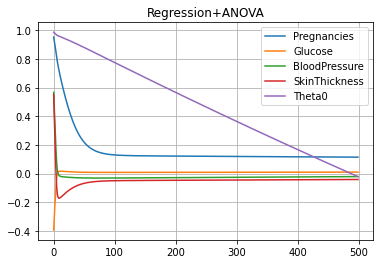

In [27]:
labels_new = selecteur.transform(np.array(diabetes.columns[:-1]).reshape(1, len(diabetes.columns)-1)).flatten()

for i in range(len(labels_new)): 
    plt.plot(range(MAX_IT), coefs_anova[:, i], label=labels[i])
plt.plot(range(MAX_IT), coefs0_anova, label="Theta0")
plt.legend()
plt.title("Regression+ANOVA")
plt.grid()
plt.show()

#### II.2.3. Comparaison entre les différentes approches de sélections d'attributs

Ici, on veut comparer des modèles appartenant à des différentes approches de sélection d'attributs : 
- **ANOVA** : c'est une modèle qui utilise la sélection d'attributs par filtrage. Ici, on prend les attributs qui participent de 50% de la variance (4 attributs dans notre cas)
- **L1** : c'est un modèle qui utilise la sélection d'attributs intégrée (embdded)
- **FFS (Forward Features Selection)** : c'est un modèle qui utilise la sélection d'attributs enveloppante (wrapper). Il commence par tester un seul attribut et ajouter d'autres en validant la solution à chaque fois. Ici, nous avons choisi 4 attributs. 
- **BFE (Backward Features Elimination)** : c'est un modèle qui utilise la sélection d'attributs enveloppante (wrapper). Il commence par tester tous les attributs et éliminer d'autres en validant la solution à chaque fois. Ici, nous avons choisi 4 attributs. 

On veut tester les modèles par rapport à celui sans sélection d'attributs en se basant sur les critères suivants :
- **F1 entrainement** : ici on veut répondre à la question "combien un modèle peut-il converger vers sa solution ?"
- **F1 test** : ici on veut répondre à la question "combien un modèle peut-il généraliser ?"
- **Nombre des itérations** : ici on veut répondre à la question "combien faut-il d'itérations pour qu'un modèle converge ?"
- **Temps pré-entrainement** : ici on veut répondre à la question "combien de temps faut-il pour préparer les attributs avant l'entrainement ?"
- **Temps entrainement** : ici on veut répondre à la question "combien de temps faut-il pour l'entrainement ?"

*P.S. L'exécution prend un peu de temps*

**Analyser les résultats** 

- Pourquoi la sélection d'attributs envelopante prend plus de temps d'entrainement pourtant elle utilise moins d'attributs ? (en se basant sur les résultats)
- Pourquoi la régression avec L1 prend plus de temps d'entrainement que la régression normale pourtant elle prend moins d'itérations ?
- Pourquoi la sélection d'attributs enveloppante donne des performances mieux que celle par filtrage pourtant cette dernière sélectionne les meilleurs attributs en terme de corrélation ? (dans notre cas, c'est le même nombre d'attributs = 4)
- Si vous avez un dataset avec plusieurs attributs et une quantité énorme d'échantillons, proposer une solution avec moins de temps de pré-entrainement+entrainement et plus de performance (par rapport la solution sans sélection d'attributs) en se basant sur les résultats de cette expérimentation.

**Réponse**

- ...
- ...
- ...
- ...

In [29]:
from sklearn.feature_selection import SequentialFeatureSelector
import timeit

CMAX_ITER = 5000
creglog = LogisticRegression(penalty='none', solver="saga", max_iter=CMAX_ITER)
creglog_l1 = LogisticRegression(penalty='l1', solver="saga", max_iter=CMAX_ITER)
creglog_anova = LogisticRegression(penalty='none', solver="saga", max_iter=CMAX_ITER)

temps = {}
temps_p = {}

temps_debut = timeit.default_timer()
creglog.fit(X_train, Y_train)
temps["reg"] = timeit.default_timer() - temps_debut


temps_debut = timeit.default_timer()
creglog_l1.fit(X_train, Y_train)
temps["l1"] = timeit.default_timer() - temps_debut

temps_debut = timeit.default_timer()
selecteur_anova = SelectPercentile(score_func=f_classif, percentile=50)
X_train_anova= selecteur.fit_transform(X_train, Y_train)
temps_p["anova"] = timeit.default_timer() - temps_debut
X_test_anova = selecteur.transform(X_test)
temps_debut = timeit.default_timer()
creglog_anova.fit(X_train_anova, Y_train)
temps["anova"] = timeit.default_timer() - temps_debut

creglog_ffs = LogisticRegression(penalty='none', solver="saga", max_iter=CMAX_ITER)
temps_debut = timeit.default_timer()
selecteur_ffs = SequentialFeatureSelector(creglog_ffs, n_features_to_select=4, direction="forward")
X_train_ffs = selecteur_ffs.fit_transform(X_train, Y_train)
temps_p["ffs"] = timeit.default_timer() - temps_debut
X_test_ffs = selecteur_ffs.transform(X_test)
temps_debut = timeit.default_timer()
creglog_ffs.fit(X_train_ffs, Y_train)
temps["ffs"] = timeit.default_timer() - temps_debut

creglog_bfe = LogisticRegression(penalty='none', solver="saga", max_iter=CMAX_ITER)
temps_debut = timeit.default_timer()
selecteur_bfe = SequentialFeatureSelector(creglog_bfe, n_features_to_select=4, direction="backward")
X_train_bfe = selecteur_bfe.fit_transform(X_train, Y_train)
temps_p["bfe"] = timeit.default_timer() - temps_debut
X_test_bfe = selecteur_bfe.transform(X_test)
temps_debut = timeit.default_timer()
creglog_bfe.fit(X_train_bfe, Y_train)
temps["bfe"] = timeit.default_timer() - temps_debut


pd.DataFrame({
    "Criteres" : ["F1 Entrainement", "F1 Test", "Nombre des itérations", "temps pré-entrainement", "temps entrainement"],
    "Reg" : [f1_score(Y_train, creglog.predict(X_train)), 
             f1_score(Y_test, creglog.predict(X_test)),
             creglog.n_iter_, 0, temps["reg"]],
    "Reg+L1" : [f1_score(Y_train, creglog_l1.predict(X_train)), 
                f1_score(Y_test, creglog_l1.predict(X_test)), 
                creglog_l1.n_iter_, 0, temps["l1"]],
    "ANOVA+Reg" : [f1_score(Y_train, creglog_anova.predict(X_train_anova)), 
                f1_score(Y_test, creglog_anova.predict(X_test_anova)), 
                creglog_anova.n_iter_, temps_p["anova"], temps["anova"]],
    "FFS" : [f1_score(Y_train, creglog_ffs.predict(X_train_ffs)), 
                f1_score(Y_test, creglog_ffs.predict(X_test_ffs)), 
                creglog_ffs.n_iter_, temps_p["ffs"], temps["ffs"]],
    "BFE" : [f1_score(Y_train, creglog_bfe.predict(X_train_bfe)), 
                f1_score(Y_test, creglog_bfe.predict(X_test_bfe)), 
                creglog_bfe.n_iter_, temps_p["bfe"], temps["bfe"]],
})

,Criteres,Reg,Reg+L1,ANOVA+Reg,FFS,BFE
0,F1 Entrainement,0.465574,0.465574,0.384058,0.585526,0.585526
1,F1 Test,0.380165,0.380165,0.37931,0.539683,0.539683
2,Nombre des itérations,[1406],[1404],[188],[5000],[5000]
3,temps pré-entrainement,0,0,0.001095,18.95739,28.57508
4,temps entrainement,0.149963,0.175624,0.013233,0.30534,0.322131
